In [52]:
import pandas as pd
import numpy as np

Загрузим данные

In [53]:
!wget -O Fake_True.csv https://www.dropbox.com/scl/fi/0tm9wefhswfx3r5c5m3n9/Fake_True-1.csv?rlkey=y4ip9fqnaxej74cmablxdm2o7&st=0um7li34&dl=0

--2024-08-23 10:31:07--  https://www.dropbox.com/scl/fi/0tm9wefhswfx3r5c5m3n9/Fake_True-1.csv?rlkey=y4ip9fqnaxej74cmablxdm2o7
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc522ea3a7239dfc02ec6db3e61e.dl.dropboxusercontent.com/cd/0/inline/CZJNDDKaq5KkQ-MFZNGkqqJ9mGQpJKGczqsW4nQjxDZTgBO5d29dyaOMQu6d4sY0YvS6gDx_H5MPbf5ebo6Lu95_a0BtP_8Eyt61tQqFjQwPN_THja9YY77rI9Qsu0cMfexMhCyur4th0swgcMIS6NIS/file# [following]
--2024-08-23 10:31:08--  https://uc522ea3a7239dfc02ec6db3e61e.dl.dropboxusercontent.com/cd/0/inline/CZJNDDKaq5KkQ-MFZNGkqqJ9mGQpJKGczqsW4nQjxDZTgBO5d29dyaOMQu6d4sY0YvS6gDx_H5MPbf5ebo6Lu95_a0BtP_8Eyt61tQqFjQwPN_THja9YY77rI9Qsu0cMfexMhCyur4th0swgcMIS6NIS/file
Resolving uc522ea3a7239dfc02ec6db3e61e.dl.dropboxusercontent.com (uc522ea3a7239dfc02ec6db3e61e.dl.dropboxusercontent.com)... 162.125.3.15, 262

In [54]:
#Readin input files
df = pd.read_csv("Fake_True.csv")

In [55]:
df.head()

,title,text,subject,date,reliability
0,u.s. budget fight loom republican flip fiscal ...,washington reuters head conservative republica...,politicsnews,december 31 2017,1
1,u.s. military accept transgender recruit monda...,washington reuters transgender people allowed ...,politicsnews,december 29 2017,1
2,senior u.s. republican senator let mr. mueller...,washington reuters special counsel investigati...,politicsnews,december 31 2017,1
3,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geor...,politicsnews,december 30 2017,1
4,trump want postal service charge much amazon s...,seattle washington reuters president donald tr...,politicsnews,december 29 2017,1


Уберем из таблицы ненужные столбый

In [56]:
df = df.drop(["title", "subject","date"], axis = 1)

Уберем стрки с пропущеными значениями

In [57]:
df.isnull().sum()

,0
text,631
reliability,0


In [59]:
df = df.dropna()
df.index = range(0,len(df))
df.isnull().sum()

,0
text,0
reliability,0


In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

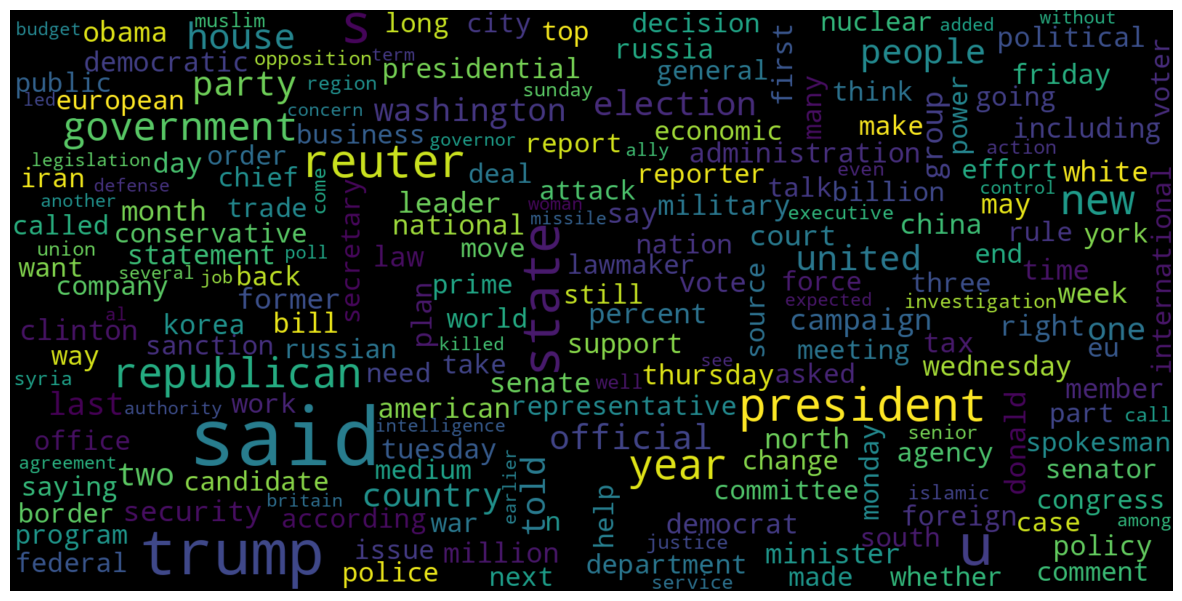

In [61]:
consolidated = ' '.join(
    word for word in df['text'][df['reliability'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

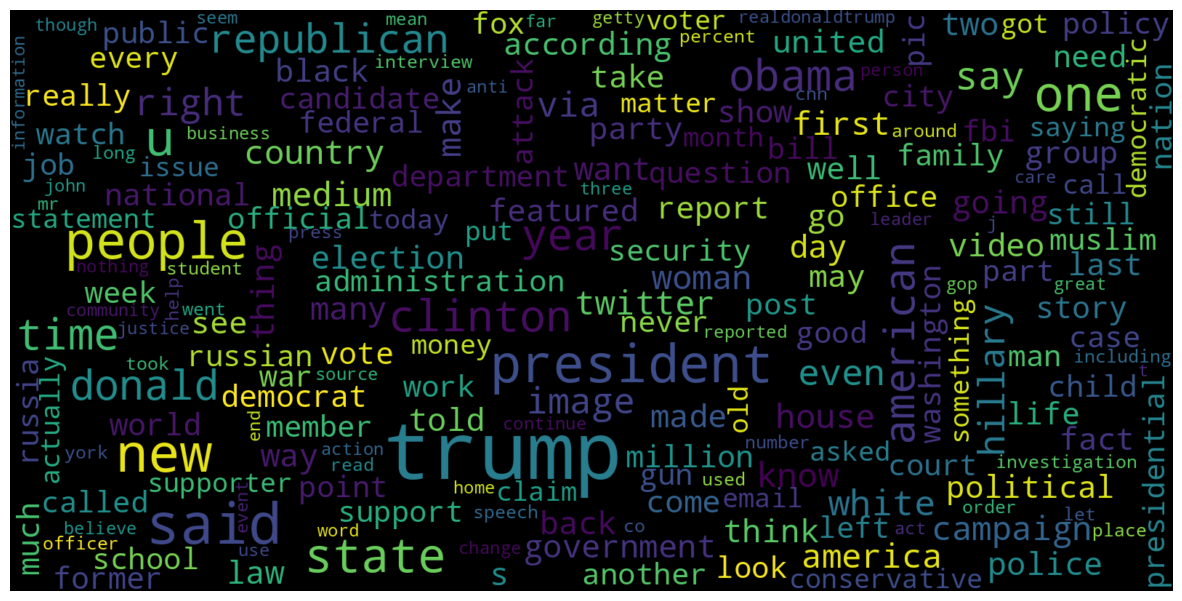

In [62]:
consolidated = ' '.join(
    word for word in df['text'][df['reliability'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

Выведем наиболее частопопадающиеся слова для фековых и реальных новостей.

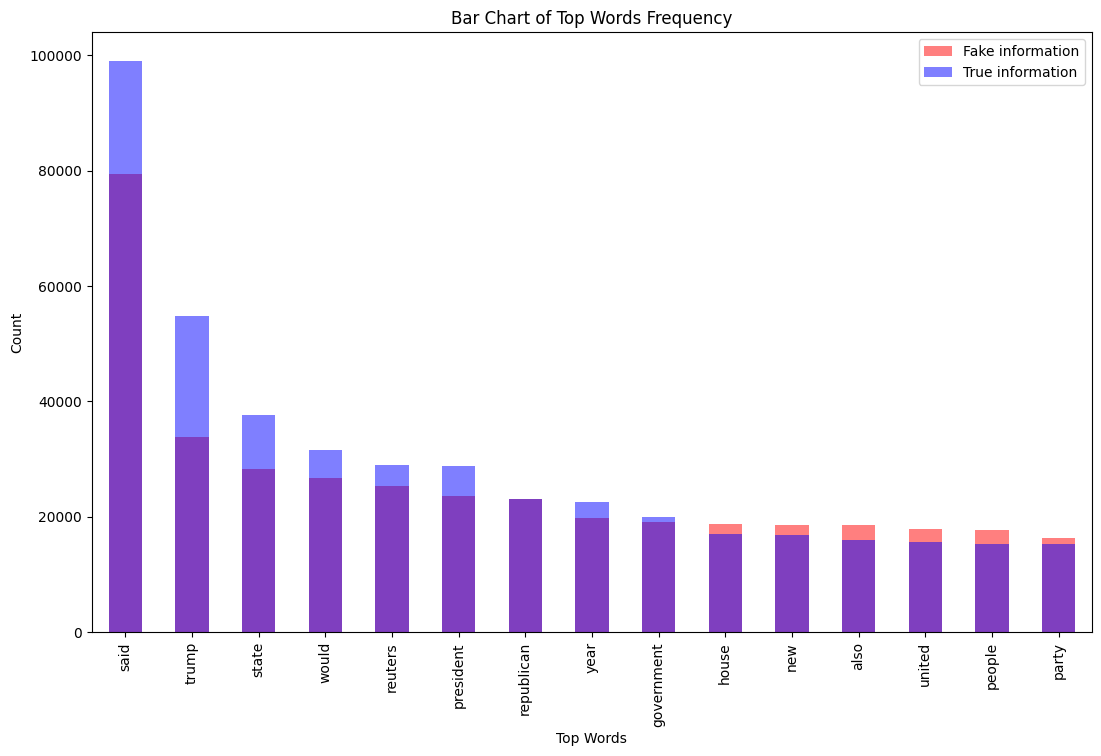

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['text'][df['reliability'] == 0], 15)
dff = pd.DataFrame(common_words, columns=['Review', 'count'])


common_words = get_top_n_words(df['text'][df['reliability'] == 1], 15)
dft = pd.DataFrame(common_words, columns=['Review', 'count'])

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])

dff.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    ax = axes,
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    legend = True,
    alpha=0.5,
    color = 'red'
)

dft.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    ax = axes,
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    legend = True,
    alpha=0.5,
    color='blue'
)

axes.legend(labels = ('Fake information',
                    'True information'),
          loc = 'upper right')

axes.set_title('Bar Chart of Top Words Frequency')

plt.show()

Уберем наиболее частопопадающиеся имена и фамилии.

In [64]:
import nltk
nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
words = ["trump", "obama", "donald", "clinton"]
def lemmatization(df, content_field):
  lemmatizer=WordNetLemmatizer()
  corpus = []
  for i in range(0,len(df)):
    text = df[content_field][i]
    tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in tokens if not word in words ]
    text = ' '.join(lemmatized_text)
    corpus.append(text)
  return corpus

In [66]:
df['text'] = lemmatization(df, 'text')

Выведем наиболее частопопадающиеся слова

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

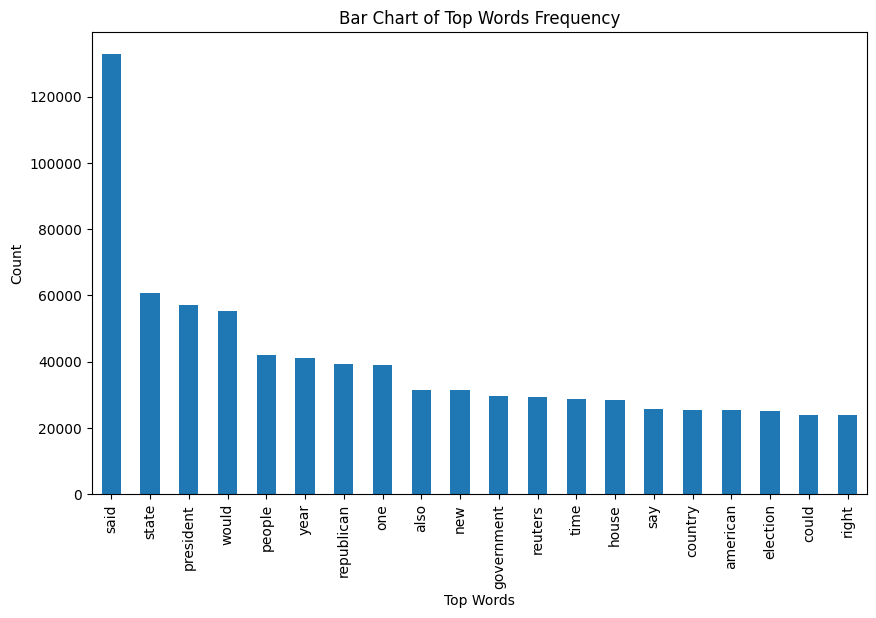

In [67]:
common_words = get_top_n_words(df['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [68]:
df.to_csv('Fake_True_new.csv', index = False)